In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape the data to include a single channel (grayscale images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Build the convolutional neural network model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.8980 - loss: 0.3280 - val_accuracy: 0.9881 - val_loss: 0.0354
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 32ms/step - accuracy: 0.9852 - loss: 0.0469 - val_accuracy: 0.9871 - val_loss: 0.0398
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9897 - loss: 0.0323 - val_accuracy: 0.9885 - val_loss: 0.0369
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9932 - loss: 0.0226 - val_accuracy: 0.9906 - val_loss: 0.0292
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9943 - loss: 0.0174 - val_accuracy: 0.9889 - val_loss: 0.0337


In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')

313/313 - 2s - 8ms/step - accuracy: 0.9889 - loss: 0.0337

Test accuracy: 0.99


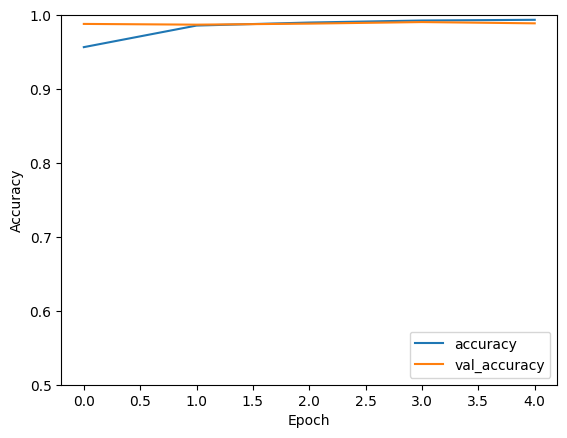

In [7]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()